# Aliasing e o teorema da amostragem

Neste notebook exploramos questões a respeito da taxa de amostragem.

In [1]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
plt.rcParams.update({'font.size': 14})

# Exemplo 1 

Vamos criar um seno, entre 0 [s] e 1[s], com frequência 10 [Hz]. Vamos variar a taxa de amostragem e averiguar o que ocorre.

In [45]:
Fs = 15.7
time = np.arange(0, 1, 1/Fs)
xt = np.sin(2*np.pi*10*time)
N = len(xt) # Num. de amostras no sinal

## 1 período do espectro

Vamos calcular o espectro com a FFT e plotar 1 período de espectro. 

Note que o vetor de frequências vai de 0 até bem perto de $F_s$.

A princípio, o espectro tem o mesmo número de amostras do sinal.

xt possui 16 amostras e Xw possui 16 componentes de frequência


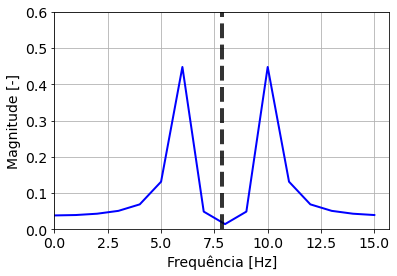

In [46]:
Xw = np.fft.fft(xt) # A princípio, o espectro tem o mesmo número de amostras do sinal
freq = np.linspace(0, (N-1)*Fs/Fs, N) # 1 período do vetor de frequências vai de 0 até bem perto de Fs.
print("xt possui {} amostras e Xw possui {} componentes de frequência".format(N, len(Xw)))

plt.figure()
plt.plot(freq, np.abs(Xw)/N, 'b', linewidth = 2)
plt.axvline(Fs/2, color='k',linestyle = '--', linewidth = 4, alpha = 0.8)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude [-]')
plt.grid(which='both', axis='both')
plt.xlim((0,Fs))
plt.ylim((0,0.6));

## Vários período do espectro

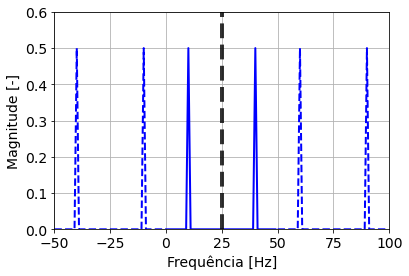

In [32]:
# novo vetor de frequências - 3 períodos
plt.figure()
plt.plot(freq-Fs, np.abs(Xw)/N, '--b', linewidth = 2)
plt.plot(freq, np.abs(Xw)/N, 'b', linewidth = 2)
plt.plot(freq+Fs, np.abs(Xw)/N, '--b', linewidth = 2)
plt.axvline(Fs/2, color='k',linestyle = '--', linewidth = 4, alpha = 0.8)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude [-]')
plt.grid(which='both', axis='both')
plt.xlim((-Fs,2*Fs))
plt.ylim((0,0.6));

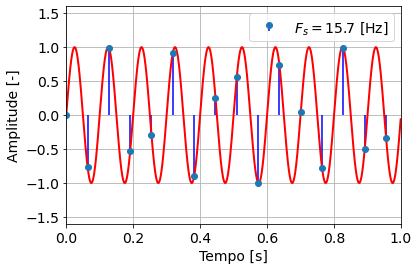

In [47]:
Fs_2 = 1000
time2 = np.arange(0, 1, 1/Fs_2)
xt_2 = np.sin(2*np.pi*10*time2)

plt.figure()
plt.plot(time2, xt_2, 'r', linewidth = 2)
#plt.plot(time, xt, '--b', linewidth = 2)
plt.stem(time, xt, '-b', label = r"$F_s = {}$ [Hz]".format(Fs), basefmt=" ", use_line_collection=  True)
plt.legend(loc = 'upper right')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.grid(which='both', axis='both')
plt.xlim((0,1))
plt.ylim((-1.6,1.6));

# Exemplo 2 - Vamos ouvir um seno com várias taxas de amostragem

In [53]:
import IPython.display as ipd
from scipy import signal

# Gerar sinal com uma taxa de amostragem
fs = 1800
t = np.arange(0, 1, 1/fs) # vetor temporal
freq = 1000
w = 2*np.pi*freq
xt = np.sin(w*t)

# Reamostrar o sinal para a placa de som conseguir tocá-lo
fs_audio = 44100
xt_play = signal.resample(xt, fs_audio)
ipd.Audio(xt_play, rate=fs_audio) # load a NumPy array

In [12]:
xt_play.shape

(44100,)

# Exemplo 3. Um sinal com 3 senos

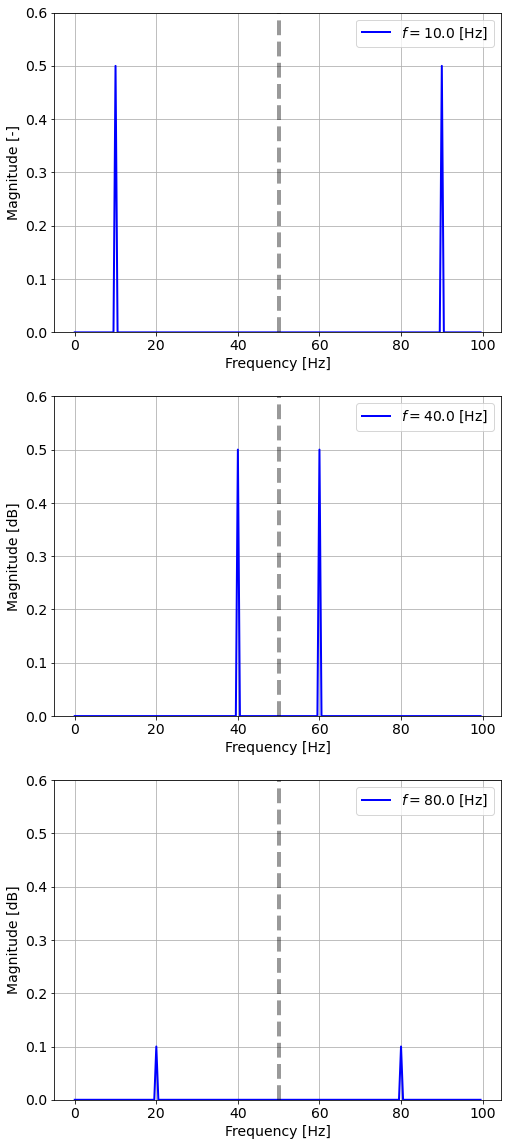

In [60]:
Fs=100
T=2.0;
t=np.arange(0,T,1/Fs)

# 3 sinais com diferentes frequências
f1=10
f2=40
f3=80 #80 e 120

x1=np.sin(2*np.pi*f1*t) 
x2=np.sin(2*np.pi*f2*t)
x3=0.2*np.sin(2*np.pi*f3*t)

# FFT
N=len(t)
X1=np.fft.fft(x1)
X2=np.fft.fft(x2)
X3=np.fft.fft(x3)
freq = np.linspace(0, (N-1)*Fs/N, N)


plt.figure(figsize=(8,20))
plt.subplot(3,1,1)
plt.plot(freq, np.abs(X1)/N, 'b', linewidth = 2, label = r"$f = {:.1f}$ [Hz]".format(f1))
plt.axvline(Fs/2, color='k',linestyle = '--', linewidth = 4, alpha = 0.4)
plt.legend(loc = 'upper right')
plt.ylim((0, 0.6))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [-]')
plt.grid(which='both', axis='both')

plt.subplot(3,1,2)
plt.plot(freq, np.abs(X2)/N, 'b', linewidth = 2, label = r"$f = {:.1f}$ [Hz]".format(f2))
plt.axvline(Fs/2, color='k',linestyle = '--', linewidth = 4, alpha = 0.4)
plt.legend(loc = 'upper right')
plt.ylim((0, 0.6))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid(which='both', axis='both')

plt.subplot(3,1,3)
plt.plot(freq, np.abs(X3)/N, 'b', linewidth = 2, label = r"$f = {:.1f}$ [Hz]".format(f3))
plt.axvline(Fs/2, color='k',linestyle = '--', linewidth = 4, alpha = 0.4)
plt.legend(loc = 'upper right')
plt.ylim((0, 0.6))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid(which='both', axis='both')